# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Loading CSV

In [24]:
dataset = pd.read_csv('../results/Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz/Intersect_masterset.csv')
dataset.head()

,range,n1,average1,std1,n2,average2,std2,skewed_1,skewed_2,non_skewed,fastest_algo
0,65518,9862,16767.2,21066.0,9862,16767.2,21066.0,1744,376,9057,skewed_2
1,65518,9862,16767.2,21066.0,10,20967.0,22080.1,433,219,151,non_skewed
2,65518,9862,16767.2,21066.0,4,21096.2,24358.7,396,76,113,skewed_2
3,65518,9862,16767.2,21066.0,48,22803.3,22462.6,467,258,15599,skewed_2
4,65518,9862,16767.2,21066.0,3131,17175.5,21213.4,908,411,1413,skewed_2


# Building Dataset

In [25]:
feature_cols = ['n1', 'n2']
algos = ['skewed_1', 'skewed_2', 'non_skewed']

In [26]:
def get_X(): 
    return dataset.loc[:, feature_cols].values

In [27]:
get_X().shape

(640000, 2)

In [28]:
def get_ys():
    return dataset.loc[:, algos].values

In [29]:
get_ys().shape

(640000, 3)

In [30]:
def get_cy():
    return np.array(dataset.loc[:, 'fastest_algo'].values)

In [31]:
get_cy().shape

(640000,)

In [32]:
def get_cyTimes():
    return np.array([min(a) for a in get_ys()])

In [33]:
get_cyTimes().shape

(640000,)

In [83]:
dataset = dataset.assign(gain=[float(max(a)) / min(a) for a in get_ys()]) 
dataset = dataset[dataset.gain > 2]
dataset = dataset.sort_values(by=['gain'], ascending=False)
dataset.head()

,range,n1,average1,std1,n2,average2,std2,skewed_1,skewed_2,non_skewed,fastest_algo,gain
406636,35512,10038,16514.50,16534.10,2,6064.00,7973.34,45309,58,18,non_skewed,2517.166667
175793,28511,6,3367.17,3711.98,9934,13028.00,13054.10,248,65151,29,non_skewed,2246.586207
406768,35512,10038,16514.50,16534.10,6,9969.83,10880.10,56310,89,33,non_skewed,1706.363636
406765,35512,10038,16514.50,16534.10,4,8799.25,9579.68,50344,57,32,non_skewed,1573.250000
237308,35512,10,6738.30,7863.47,10038,16514.50,16534.10,447,32935,21,non_skewed,1568.333333


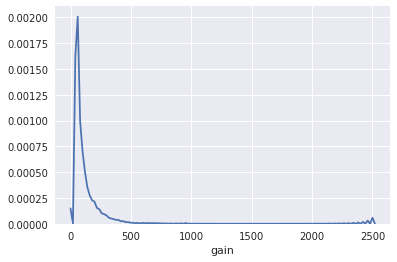

In [84]:
from scipy.stats import norm
sns.set();
sns.distplot(dataset.gain, hist=False)

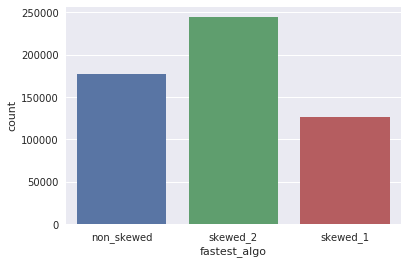

In [85]:
sns.set(color_codes=True)
sns.countplot(x="fastest_algo", data=d)

In [116]:
val_count = dataset["fastest_algo"].value_counts().tolist()
min_count = min(val_count)
count_array = [min_count for i in val_count]
print(count_array)
for i, row in dataset.iterrows():
    algo_index = algos.index(row["fastest_algo"])
    count_array[algo_index]-=1
    if(count_array[algo_index] <= 0):
        dataset.drop(i, inplace=True)
        print(dataset.shape)
dataset.shape

[126817, 126817, 126817]
(548611, 12)
(548610, 12)
(548609, 12)
(548608, 12)
(548607, 12)
(548606, 12)
(548605, 12)
(548604, 12)
(548603, 12)
(548602, 12)
(548601, 12)
(548600, 12)
(548599, 12)
(548598, 12)
(548597, 12)
(548596, 12)
(548595, 12)
(548594, 12)
(548593, 12)
(548592, 12)
(548591, 12)
(548590, 12)
(548589, 12)
(548588, 12)
(548587, 12)
(548586, 12)
(548585, 12)
(548584, 12)
(548583, 12)
(548582, 12)
(548581, 12)
(548580, 12)
(548579, 12)
(548578, 12)
(548577, 12)
(548576, 12)
(548575, 12)
(548574, 12)
(548573, 12)
(548572, 12)
(548571, 12)
(548570, 12)
(548569, 12)
(548568, 12)
(548567, 12)
(548566, 12)
(548565, 12)
(548564, 12)
(548563, 12)
(548562, 12)
(548561, 12)
(548560, 12)
(548559, 12)
(548558, 12)
(548557, 12)
(548556, 12)
(548555, 12)
(548554, 12)
(548553, 12)
(548552, 12)
(548551, 12)
(548550, 12)
(548549, 12)
(548548, 12)
(548547, 12)
(548546, 12)
(548545, 12)
(548544, 12)
(548543, 12)
(548542, 12)
(548541, 12)
(548540, 12)
(548539, 12)
(548538, 12)
(548537, 12)


(547979, 12)
(547978, 12)
(547977, 12)
(547976, 12)
(547975, 12)
(547974, 12)
(547973, 12)
(547972, 12)
(547971, 12)
(547970, 12)
(547969, 12)
(547968, 12)
(547967, 12)
(547966, 12)
(547965, 12)
(547964, 12)
(547963, 12)
(547962, 12)
(547961, 12)
(547960, 12)
(547959, 12)
(547958, 12)
(547957, 12)
(547956, 12)
(547955, 12)
(547954, 12)
(547953, 12)
(547952, 12)
(547951, 12)
(547950, 12)
(547949, 12)
(547948, 12)
(547947, 12)
(547946, 12)
(547945, 12)
(547944, 12)
(547943, 12)
(547942, 12)
(547941, 12)
(547940, 12)
(547939, 12)
(547938, 12)
(547937, 12)
(547936, 12)
(547935, 12)
(547934, 12)
(547933, 12)
(547932, 12)
(547931, 12)
(547930, 12)
(547929, 12)
(547928, 12)
(547927, 12)
(547926, 12)
(547925, 12)
(547924, 12)
(547923, 12)
(547922, 12)
(547921, 12)
(547920, 12)
(547919, 12)
(547918, 12)
(547917, 12)
(547916, 12)
(547915, 12)
(547914, 12)
(547913, 12)
(547912, 12)
(547911, 12)
(547910, 12)
(547909, 12)
(547908, 12)
(547907, 12)
(547906, 12)
(547905, 12)
(547904, 12)
(547903, 12)

(547345, 12)
(547344, 12)
(547343, 12)
(547342, 12)
(547341, 12)
(547340, 12)
(547339, 12)
(547338, 12)
(547337, 12)
(547336, 12)
(547335, 12)
(547334, 12)
(547333, 12)
(547332, 12)
(547331, 12)
(547330, 12)
(547329, 12)
(547328, 12)
(547327, 12)
(547326, 12)
(547325, 12)
(547324, 12)
(547323, 12)
(547322, 12)
(547321, 12)
(547320, 12)
(547319, 12)
(547318, 12)
(547317, 12)
(547316, 12)
(547315, 12)
(547314, 12)
(547313, 12)
(547312, 12)
(547311, 12)
(547310, 12)
(547309, 12)
(547308, 12)
(547307, 12)
(547306, 12)
(547305, 12)
(547304, 12)
(547303, 12)
(547302, 12)
(547301, 12)
(547300, 12)
(547299, 12)
(547298, 12)
(547297, 12)
(547296, 12)
(547295, 12)
(547294, 12)
(547293, 12)
(547292, 12)
(547291, 12)
(547290, 12)
(547289, 12)
(547288, 12)
(547287, 12)
(547286, 12)
(547285, 12)
(547284, 12)
(547283, 12)
(547282, 12)
(547281, 12)
(547280, 12)
(547279, 12)
(547278, 12)
(547277, 12)
(547276, 12)
(547275, 12)
(547274, 12)
(547273, 12)
(547272, 12)
(547271, 12)
(547270, 12)
(547269, 12)

(546711, 12)
(546710, 12)
(546709, 12)
(546708, 12)
(546707, 12)
(546706, 12)
(546705, 12)
(546704, 12)
(546703, 12)
(546702, 12)
(546701, 12)
(546700, 12)
(546699, 12)
(546698, 12)
(546697, 12)
(546696, 12)
(546695, 12)
(546694, 12)
(546693, 12)
(546692, 12)
(546691, 12)
(546690, 12)
(546689, 12)
(546688, 12)
(546687, 12)
(546686, 12)
(546685, 12)
(546684, 12)
(546683, 12)
(546682, 12)
(546681, 12)
(546680, 12)
(546679, 12)
(546678, 12)
(546677, 12)
(546676, 12)
(546675, 12)
(546674, 12)
(546673, 12)
(546672, 12)
(546671, 12)
(546670, 12)
(546669, 12)
(546668, 12)
(546667, 12)
(546666, 12)
(546665, 12)
(546664, 12)
(546663, 12)
(546662, 12)
(546661, 12)
(546660, 12)
(546659, 12)
(546658, 12)
(546657, 12)
(546656, 12)
(546655, 12)
(546654, 12)
(546653, 12)
(546652, 12)
(546651, 12)
(546650, 12)
(546649, 12)
(546648, 12)
(546647, 12)
(546646, 12)
(546645, 12)
(546644, 12)
(546643, 12)
(546642, 12)
(546641, 12)
(546640, 12)
(546639, 12)
(546638, 12)
(546637, 12)
(546636, 12)
(546635, 12)

(546076, 12)
(546075, 12)
(546074, 12)
(546073, 12)
(546072, 12)
(546071, 12)
(546070, 12)
(546069, 12)
(546068, 12)
(546067, 12)
(546066, 12)
(546065, 12)
(546064, 12)
(546063, 12)
(546062, 12)
(546061, 12)
(546060, 12)
(546059, 12)
(546058, 12)
(546057, 12)
(546056, 12)
(546055, 12)
(546054, 12)
(546053, 12)
(546052, 12)
(546051, 12)
(546050, 12)
(546049, 12)
(546048, 12)
(546047, 12)
(546046, 12)
(546045, 12)
(546044, 12)
(546043, 12)
(546042, 12)
(546041, 12)
(546040, 12)
(546039, 12)
(546038, 12)
(546037, 12)
(546036, 12)
(546035, 12)
(546034, 12)
(546033, 12)
(546032, 12)
(546031, 12)
(546030, 12)
(546029, 12)
(546028, 12)
(546027, 12)
(546026, 12)
(546025, 12)
(546024, 12)
(546023, 12)
(546022, 12)
(546021, 12)
(546020, 12)
(546019, 12)
(546018, 12)
(546017, 12)
(546016, 12)
(546015, 12)
(546014, 12)
(546013, 12)
(546012, 12)
(546011, 12)
(546010, 12)
(546009, 12)
(546008, 12)
(546007, 12)
(546006, 12)
(546005, 12)
(546004, 12)
(546003, 12)
(546002, 12)
(546001, 12)
(546000, 12)

KeyboardInterrupt: 

In [115]:
def getBenchmarkSet():
    benchmarkSet = X.tolist()
    for index, attributes in enumerate(benchmarkSet):
        for times in ys:
            attributes.append(times[index])
        attributes.append(cyTimes[index])
        attributes.append(cy[index])
    return np.array(benchmarkSet)

In [121]:
benchmarkSet = getBenchmarkSet()
benchmarkSet.shape

(39601, 8)

In [122]:
def clfSplit():
    return train_test_split(X, cy, test_size=0.2, random_state=0)

# Calculating value of the project

In [123]:
def percentChange(new, old):
    return ((float(old)/new)-1)

In [124]:
def getAlgoTime(algoName, row):
    for index, algo in enumerate(algos):
        if(algoName == algo):
            return int(row[len(X[0]) + index])
    print('oups none of the available algos')

In [125]:
def getOldSchoolAlgo(n1, n2):
    threshold = 64
    n1 = float(n1)
    n2 = float(n2)
    if (n1 * threshold < n2):
        return 'skewed_1'
    if (n2 * threshold < n1):
        return 'skewed_2'
    return 'non_skewed'

In [126]:
def calculateValueOfML():
    X_train, X_test, y_train, y_test = train_test_split(benchmarkSet, benchmarkSet, test_size=0.3, random_state=0)
    
    clf = DecisionTreeClassifier(max_depth=None, random_state=0)
    clf.fit(X_train[:, 0:len(X[0])], y_train[:,-1])

    mlChosenAlgos = clf.predict(X_test[:, 0:len(X[0])])

    GoodPredictionsCount = 0
    mlTotTime = 0
    osTotTime = 0
    perfectTotTime = 0
    for i, algo in enumerate(mlChosenAlgos):
        if(algo == y_test[i,-1]):
            GoodPredictionsCount += 1
        mlTotTime += getAlgoTime(algo, y_test[i])
        n1 = y_test[i,feature_cols.index('n1')]
        n2 = y_test[i,feature_cols.index('n2')]
        osAlgo = getOldSchoolAlgo(n1 , n2)
        #print(osAlgo)
        osTotTime += getAlgoTime(osAlgo, y_test[i])
        perfectTotTime += int(y_test[i,-2])

    print("Average classification precision: %.2f" % (float(GoodPredictionsCount)/len(mlChosenAlgos)))
    print("Total ml time: %d" % mlTotTime)
    print("Total old school time: %d" % osTotTime)
    print("Machine learning is faster by : %.2f" % percentChange(mlTotTime, osTotTime))
    print("With perfect prediction : %.2f" % percentChange(perfectTotTime, osTotTime))

In [127]:
calculateValueOfML()

['65535.0' '240934.0' '9764.0' '3096' '1253' '41042' '1253' 'skewed_2']
Average classification precision: 0.87
Total ml time: 10222464
Total old school time: 438668374
Machine learning is faster by : 41.91
With perfect prediction : 44.55


# Serialize model

In [ ]:
# from sklearn.externals import joblib

# clf = DecisionTreeClassifier(max_depth=None, random_state=0)
# clf.fit(X, cy)
# joblib.dump(clf, '.joblib')